In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def fileI(filename):
    tmp = []
    f = open(filename,'r');
    lines = f.readlines()
    for line in lines:
        tmp.append(line);
    out=np.zeros([len(tmp),5]);
    for i in range(len(out)):
        out[i,:] = np.array(tmp[i].split()).astype(np.float)
    return out;

In [4]:
data = fileI('RSN1091_NORTHR_VAS000.AT2');

In [7]:
data1 = np.zeros(len(data)*5); idx = 0;
for i in range(len(data)):
    for j in range(5):
        data1[idx] = data[i,j];
        idx += 1;

In [8]:
data1

array([1.249601e-04, 1.285706e-04, 1.255654e-04, ..., 1.068545e-06,
       1.578578e-06, 2.051648e-06])

In [10]:
dt = 0.02;
time = np.zeros(len(data1));
for i in range(len(data1)):
    time[i] = dt*i;

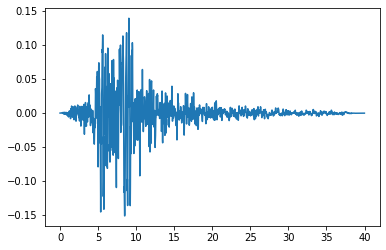

In [11]:
plt.plot(time,data1);

In [15]:
def tau_mnk(m,n,k):
    return k/(n-m);

In [20]:
def psi_mnk(m,n,k,t):
    out = 0;
    for j in range(m,n):
        out += np.exp(2j*np.pi*j*(t-tau_mnk(m,n,k)));
    return out;

In [16]:
def a_mnk(dt,tf,m,n,k,th):
    out = 0; N = len(th);
    for l in range(N):